In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm untuk visualisasi proses
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



In [31]:
# Load pre-processed quantum feature images and labels

q_train_images = np.load(r"hasil\demonstration_assets_2q_train_images_60000.npy")
q_train_labels = np.load(r"hasil\demonstration_assets_2q_train_labels_60000.npy")
q_test_images = np.load(r"hasil\demonstration_assets_2q_test_images.npy_1000.npy")
q_test_labels = np.load(r"hasil\demonstration_assets_2q_test_labels_1000.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'hasil\\demonstration_assets_2q_test_images.npy_1000.npy'

In [22]:
q_train_images.shape,q_train_labels.shape,q_test_images.shape,q_test_labels.shape

((600, 14, 14, 4), (12000,), (100, 14, 14, 4), (2000,))

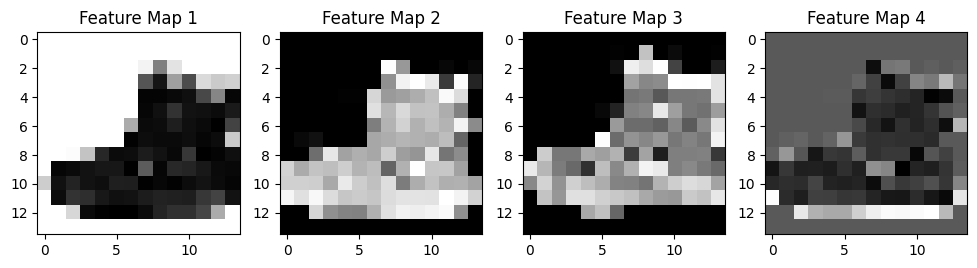

In [14]:
import matplotlib.pyplot as plt

# Pilih gambar pertama
sample_img = q_train_images[0]  # (14,14,4)

# Tampilkan masing-masing channel fitur
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(sample_img[:, :, i], cmap="gray")
    axes[i].set_title(f"Feature Map {i+1}")
plt.show()

In [15]:
q_train_labels

array([9, 0, 0, ..., 9, 4, 4], dtype=uint8)

In [16]:
print(q_train_images.shape)

(600, 14, 14, 4)


In [18]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm

# 1️⃣ Reshape data hasil ekstraksi fitur
X_train = q_train_images.reshape(q_train_images.shape[0], -1)  
X_test = q_test_images.reshape(q_test_images.shape[0], -1)    

y_train = q_train_labels
y_test = q_test_labels

# 2️⃣ Daftar kernel yang akan digunakan
kernels = ["linear", "poly", "rbf", "sigmoid"]

# 3️⃣ Looping untuk setiap kernel
for kernel in kernels:
    print(f"\n🔄 Training SVM dengan kernel: {kernel}...")
    svm_model = SVC(kernel=kernel)

    # Latih model dengan tqdm
    for _ in tqdm(range(1), desc=f"Training Progress ({kernel})"):
        svm_model.fit(X_train, y_train)

    # Prediksi dengan tqdm
    print("\n🔄 Predicting...")
    y_pred = []
    for i in tqdm(range(len(X_test)), desc=f"Prediction Progress ({kernel})"):
        y_pred.append(svm_model.predict([X_test[i]])[0])  
    y_pred = np.array(y_pred)

    # Evaluasi akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n✅ Akurasi SVM dengan kernel {kernel}: {accuracy * 100:.2f}%")

    # Classification Report
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 🔹 Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {kernel}")
    plt.show()



🔄 Training SVM dengan kernel: linear...


Training Progress (linear):   0%|          | 0/1 [00:00<?, ?it/s]


ValueError: Found input variables with inconsistent numbers of samples: [600, 12000]

In [20]:
X_train.shape, y_train.shape

((600, 784), (12000,))

In [ ]:
svm_model = SVC(kernel="rbf")  # Bisa coba kernel RBF untuk hasil yang lebih baik



🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      1.00      1.00        13
           2       0.58      0.50      0.54        14
           3       0.86      0.67      0.75         9
           4       0.54      0.70      0.61        10
           5       0.70      0.78      0.74         9
           6       0.67      0.75      0.71         8
           7       0.80      0.73      0.76        11
           8       0.92      0.92      0.92        12
           9       0.67      0.67      0.67         6

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



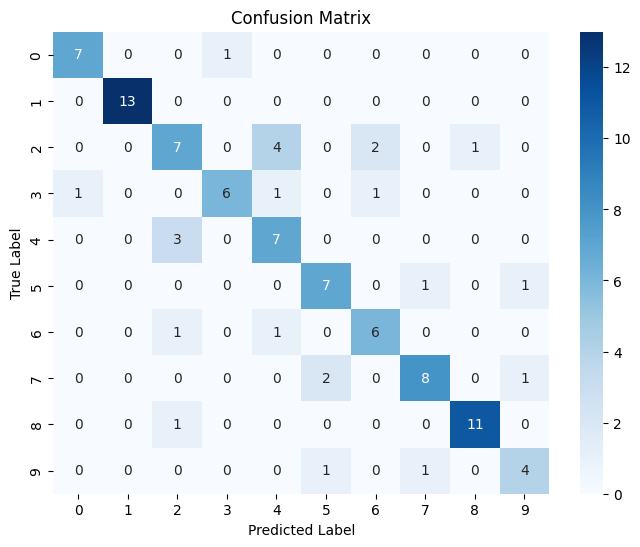

In [ ]:

# 🔹 Metrics Lengkap
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔹 Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

🔄 Training SVM...


Training Progress: 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]



🔄 Predicting...


Prediction Progress: 100%|██████████| 200/200 [00:00<00:00, 4444.13it/s]


✅ Akurasi SVM: 82.50%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.96      1.00      0.98        27
           2       0.70      0.70      0.70        27
           3       0.82      0.82      0.82        17
           4       0.61      0.67      0.64        21
           5       0.81      0.81      0.81        16
           6       0.69      0.69      0.69        16
           7       0.78      0.90      0.84        20
           8       1.00      0.94      0.97        18
           9       1.00      0.83      0.91        18

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.83       200
weighted avg       0.83      0.82      0.83       200



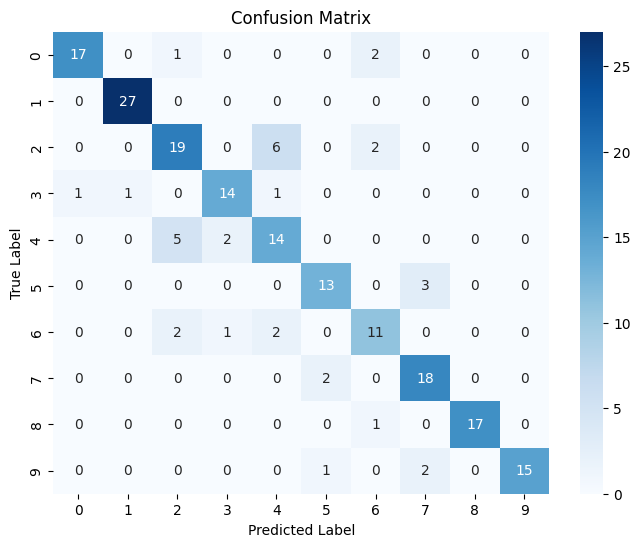

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from tensorflow import keras

# 1️⃣ Load dataset Fashion-MNIST
fmnist_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist_dataset.load_data()

# 2️⃣ Normalisasi citra ke rentang [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3️⃣ Reshape gambar dari (28,28) ke (28*28) = 784 fitur per gambar
X_train = train_images.reshape(train_images.shape[0], -1)  # (60000, 784)
X_test = test_images.reshape(test_images.shape[0], -1)     # (10000, 784)

y_train = train_labels
y_test = test_labels

# 4️⃣ Inisialisasi model SVM
svm_model = SVC(kernel="linear")  # Kernel linear karena data cukup besar

# 5️⃣ Latih model dengan tqdm
print("🔄 Training SVM...")
for i in tqdm(range(1), desc="Training Progress"):
    svm_model.fit(X_train[:1000], y_train[:1000])  # Gunakan subset 1000 data untuk kecepatan

# 6️⃣ Prediksi dengan tqdm
print("\n🔄 Predicting...")
y_pred = []
for i in tqdm(range(len(X_test[:200])), desc="Prediction Progress"):
    y_pred.append(svm_model.predict([X_test[i]])[0])  # Prediksi satu per satu
y_pred = np.array(y_pred)

# 7️⃣ Evaluasi Model
accuracy = accuracy_score(y_test[:200], y_pred)
print(f"\n✅ Akurasi SVM: {accuracy * 100:.2f}%")

# 8️⃣ Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test[:200], y_pred))

# 9️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_test[:200], y_pred)

# 🔹 Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



🔄 Training SVM dengan kernel: linear...


Training Progress (linear): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]



🔄 Predicting...


Prediction Progress (linear): 100%|██████████| 200/200 [00:00<00:00, 3884.91it/s]



✅ Akurasi SVM dengan kernel linear: 82.50%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.96      1.00      0.98        27
           2       0.70      0.70      0.70        27
           3       0.82      0.82      0.82        17
           4       0.61      0.67      0.64        21
           5       0.81      0.81      0.81        16
           6       0.69      0.69      0.69        16
           7       0.78      0.90      0.84        20
           8       1.00      0.94      0.97        18
           9       1.00      0.83      0.91        18

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.83       200
weighted avg       0.83      0.82      0.83       200


🔄 Training SVM dengan kernel: poly...


Training Progress (poly): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]



🔄 Predicting...


Prediction Progress (poly): 100%|██████████| 200/200 [00:00<00:00, 3508.53it/s]



✅ Akurasi SVM dengan kernel poly: 77.00%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.96      0.96      0.96        27
           2       0.86      0.67      0.75        27
           3       0.86      0.71      0.77        17
           4       0.76      0.62      0.68        21
           5       0.47      0.94      0.62        16
           6       0.43      0.56      0.49        16
           7       0.90      0.90      0.90        20
           8       0.89      0.94      0.92        18
           9       1.00      0.72      0.84        18

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.77       200
weighted avg       0.81      0.77      0.78       200


🔄 Training SVM dengan kernel: rbf...


Training Progress (rbf): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]



🔄 Predicting...


Prediction Progress (rbf): 100%|██████████| 200/200 [00:00<00:00, 2408.46it/s]



✅ Akurasi SVM dengan kernel rbf: 80.50%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      0.96      0.98        27
           2       0.68      0.63      0.65        27
           3       0.80      0.94      0.86        17
           4       0.65      0.62      0.63        21
           5       0.78      0.88      0.82        16
           6       0.53      0.62      0.57        16
           7       0.81      0.85      0.83        20
           8       0.94      0.89      0.91        18
           9       0.93      0.78      0.85        18

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200


🔄 Training SVM dengan kernel: sigmoid...


Training Progress (sigmoid): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]



🔄 Predicting...


Prediction Progress (sigmoid): 100%|██████████| 200/200 [00:00<00:00, 2361.15it/s]



✅ Akurasi SVM dengan kernel sigmoid: 47.50%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.30      0.26        20
           1       0.45      0.89      0.60        27
           2       0.67      0.15      0.24        27
           3       1.00      0.41      0.58        17
           4       0.21      0.43      0.29        21
           5       0.63      0.75      0.69        16
           6       0.00      0.00      0.00        16
           7       0.76      0.80      0.78        20
           8       0.67      0.11      0.19        18
           9       0.75      0.83      0.79        18

    accuracy                           0.47       200
   macro avg       0.54      0.47      0.44       200
weighted avg       0.54      0.47      0.44       200



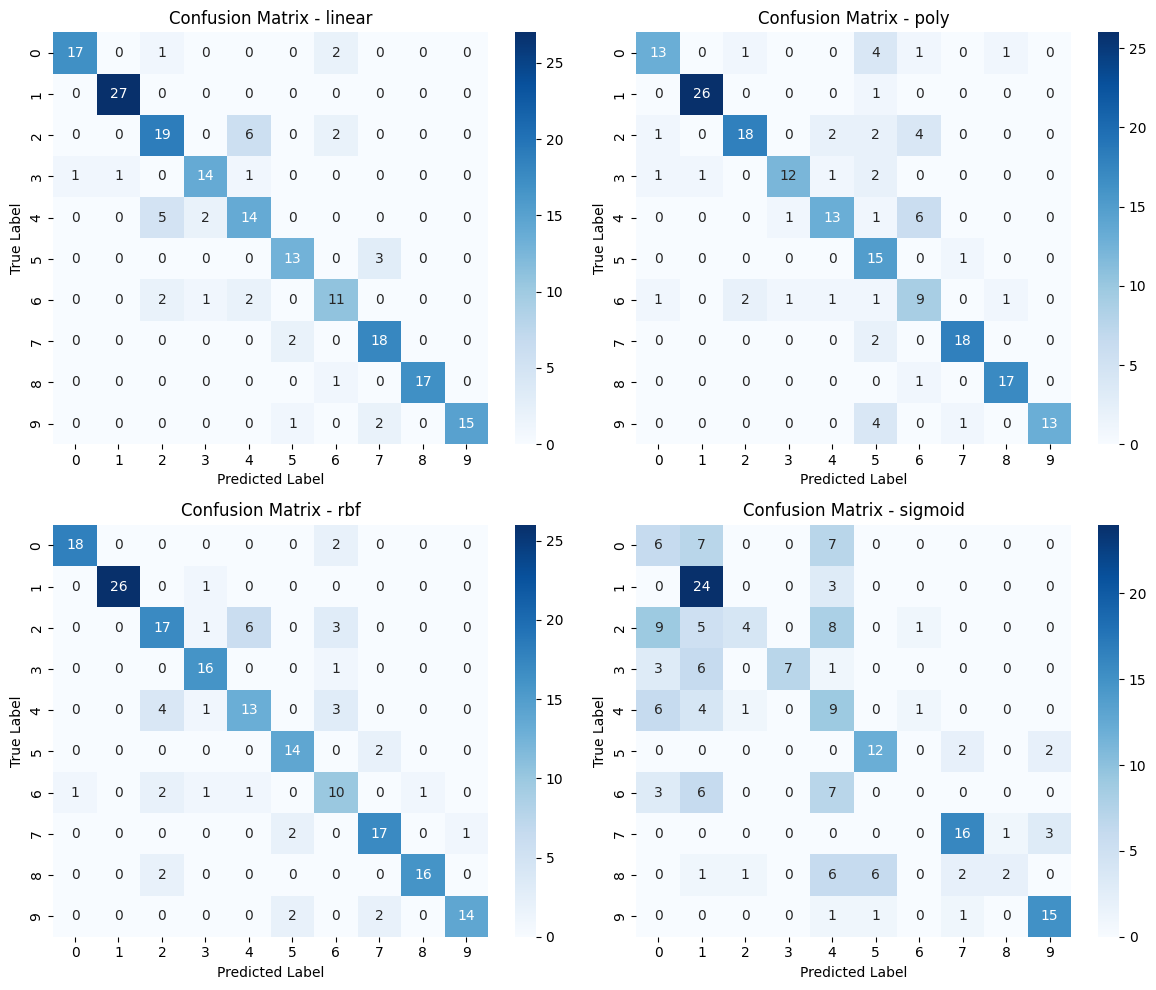

Akurasi untuk kernel linear: 82.50%
Akurasi untuk kernel poly: 77.00%
Akurasi untuk kernel rbf: 80.50%
Akurasi untuk kernel sigmoid: 47.50%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from tensorflow import keras

# 1️⃣ Load dataset Fashion-MNIST
fmnist_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist_dataset.load_data()

# 2️⃣ Normalisasi citra ke rentang [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3️⃣ Reshape gambar dari (28,28) ke (28*28) = 784 fitur per gambar
X_train = train_images.reshape(train_images.shape[0], -1)[:1000]  # Gunakan subset 1000 data
X_test = test_images.reshape(test_images.shape[0], -1)[:200]     # Gunakan subset 200 data
y_train = train_labels[:1000]
y_test = test_labels[:200]

# 4️⃣ Daftar kernel yang akan diuji
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

for kernel in kernels:
    print(f"\n🔄 Training SVM dengan kernel: {kernel}...")
    svm_model = SVC(kernel=kernel)
    
    # Training dengan tqdm
    for _ in tqdm(range(1), desc=f"Training Progress ({kernel})"):
        svm_model.fit(X_train, y_train)
    
    # Prediksi dengan tqdm
    print("\n🔄 Predicting...")
    y_pred = []
    for i in tqdm(range(len(X_test)), desc=f"Prediction Progress ({kernel})"):
        y_pred.append(svm_model.predict([X_test[i]])[0])
    y_pred = np.array(y_pred)
    
    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n✅ Akurasi SVM dengan kernel {kernel}: {accuracy * 100:.2f}%")
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Simpan hasil
    results[kernel] = {
        "accuracy": accuracy,
        "y_pred": y_pred,
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

# 5️⃣ Visualisasi Confusion Matrix untuk tiap kernel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    sns.heatmap(results[kernel]["conf_matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=range(10), yticklabels=range(10), ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {kernel}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# 6️⃣ Tampilkan hasil akurasi untuk setiap kernel
for kernel in kernels:
    print(f"Akurasi untuk kernel {kernel}: {results[kernel]['accuracy'] * 100:.2f}%")
